In [1]:
from scipy.odr import RealData, ODR, quadratic
import numpy as np

In [2]:
data = RealData(x=[30, 40, 50], y=[34.7, 36.3, 30.0], sy=[0.8, 0.1, 0.1])

In [3]:
odr = ODR(data, quadratic)

In [4]:
odr.run()

In [5]:
odr.output.pprint()

Beta: [ -0.0395   2.925  -17.5   ]
Beta Std Error: [  2.67607647e-16   2.14238635e-14   4.31708983e-13]
Beta Covariance: [[  5.67383398e-05  -4.51091686e-03   8.90031084e-02]
 [ -4.51091686e-03   3.63642948e-01  -7.27607319e+00]
 [  8.90031084e-02  -7.27607319e+00   1.47659623e+02]]
Residual Variance: 1.2621774483536189e-27
Inverse Condition #: 1.1623751228859986e-05
Reason(s) for Halting:
  Parameter convergence


In [6]:
B = odr.output.beta; print(f'B = {B}')
S = np.diag(odr.output.cov_beta); print(f'S = {S}')

B = [ -0.0395   2.925  -17.5   ]
S = [  5.67383398e-05   3.63642948e-01   1.47659623e+02]


In [26]:
maxloc = -B[1]/(2*B[0]); maxloc

37.588235294117645

In [27]:
maxunc = np.sqrt(B[1]**2/(4*B[0]**4)*S[0]**2+1/(4*B[0]**2)*S[1]**2); maxunc

3.0253925831748347

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

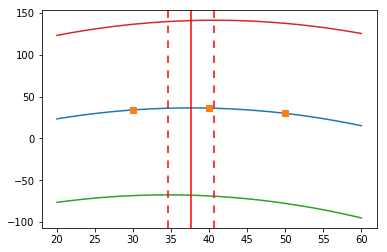

In [29]:
x = np.arange(20, 60, 0.01)
plt.plot(x, quadratic.fcn(B, x))
plt.plot(data.x, data.y, 's')
# plt.plot(x, quadratic.fcn(B - S, x))
# plt.plot(x, quadratic.fcn(B + S, x))
plt.axvline(maxloc, color='r')
plt.axvline(maxloc - maxunc, color='r', dashes=[5,5])
plt.axvline(maxloc + maxunc, color='r', dashes=[5,5])